In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [21]:
X, y = datasets.make_classification(n_samples=50, n_features=2, n_informative = 2,n_redundant = 0 ,n_classes=3, n_clusters_per_class=1,class_sep=2,shuffle=False,random_state=123456)

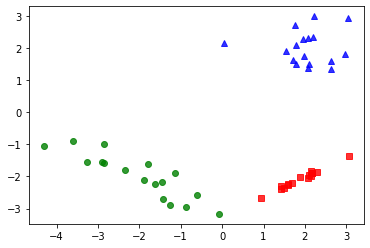

In [22]:
X0 = X[y == 0,:]
X1 = X[y == 1,:]
X2 = X[y==2,:]
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
plt.plot(X2[:,0],X2[:,1],'rs',markersize = 6 , alpha =.8)

In [23]:
def one_hot(y,C):
  y_hot = np.zeros((len(y),C))
  y_hot[np.arange(len(y)),y] = 1
  return y_hot
def softmax(X):
  exp = np.exp(X - np.max(X))
  for i in range(len(X)):
    exp[i] /= np.sum(exp[i])
  return exp 
def fit(X,y,lr,C,epochs):
  m,n = X.shape
  w = np.random.random((n,C))
  b = np.random.random(C)

  losses = []
  for i in range(epochs):
    z = X.dot(w) + b
    y_hat = softmax(z)
    y_hot = one_hot(y,C)
    w_grad = (1/m)*np.dot(X.T,(y_hat - y_hot))
    b_grad = (1/m)*np.sum(y_hat - y_hot)

    w = w - lr*w_grad
    b = b - lr*b_grad

    loss = -np.mean(np.log(y_hat[np.arange(len(y)),y]))
    losses.append(loss)
  return w,b,loss
  
def pred(w, X):
    A = softmax(w.dot(X))
    return np.argmax(A, axis = 0)


In [24]:
w,b,l = fit(X,y,lr = 0.5 , C = 3,epochs = 10000)

In [25]:
w

array([[ 3.31954531, -4.84697141,  3.58447716],
       [ 4.714604  , -2.13158027, -0.75412679]])

In [26]:
b

array([0.96884577, 0.33603747, 0.71729598])

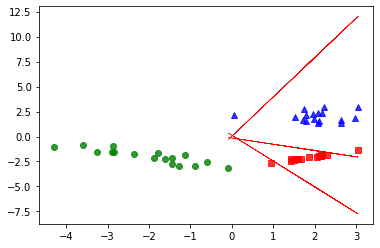

In [7]:
x11 = np.where(X[:,0] > -0.5,X[:,0],0)

plt.plot(x11,(-w[0][0]*x11-b[0])/w[1][0],color='red',linewidth =0.5)
plt.plot(x11,(-w[0][1]*x11-b[1])/w[1][1],color='red',linewidth =0.5)
plt.plot(x11,(-w[0][2]*x11-b[2])/w[1][2],color='red',linewidth =0.5)
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
plt.plot(X2[:,0],X2[:,1],'rs',markersize = 6 , alpha =.8)

In [27]:
from sklearn.linear_model import LogisticRegression

In [35]:
soft = LogisticRegression(multi_class="multinomial")
soft.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [36]:
soft.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [38]:
soft.score(X,y)

1.0

In [39]:
soft.coef_

array([[ 0.23118495,  1.28097639],
       [-1.31224374, -0.46522195],
       [ 1.08105879, -0.81575444]])

In [40]:
soft.intercept_

array([ 0.81425288,  0.3965884 , -1.21084127])

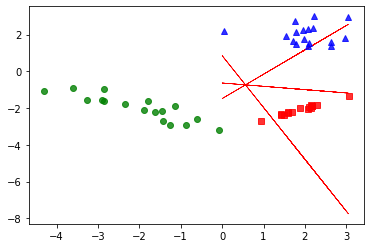

In [47]:
w = soft.coef_.T
b=soft.intercept_
x11 = np.where(X[:,0] > 0.3,X[:,0],0)

plt.plot(x11,(-w[0][0]*x11-b[0])/w[1][0],color='red',linewidth =0.5)
plt.plot(x11,(-w[0][1]*x11-b[1])/w[1][1],color='red',linewidth =0.5)
plt.plot(x11,(-w[0][2]*x11-b[2])/w[1][2],color='red',linewidth =0.5)
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
plt.plot(X2[:,0],X2[:,1],'rs',markersize = 6 , alpha =.8)